## Health Insurance Project (Regression )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
health_insu = pd.read_csv('insurance.csv')
health_insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
health_insu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
health_insu.drop_duplicates(inplace=True)

In [6]:
health_insu.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


## Exploration Data Analysis (EDA)

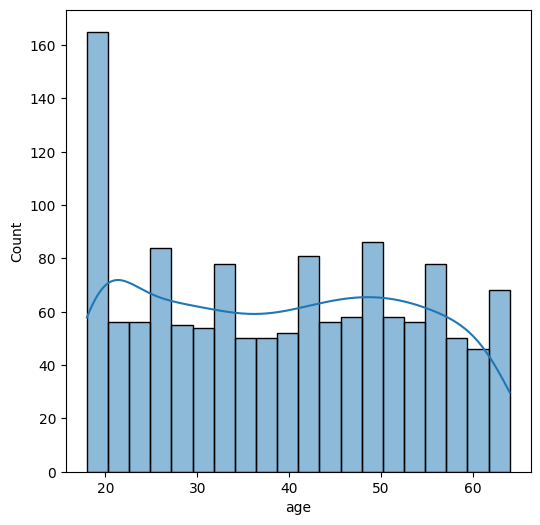

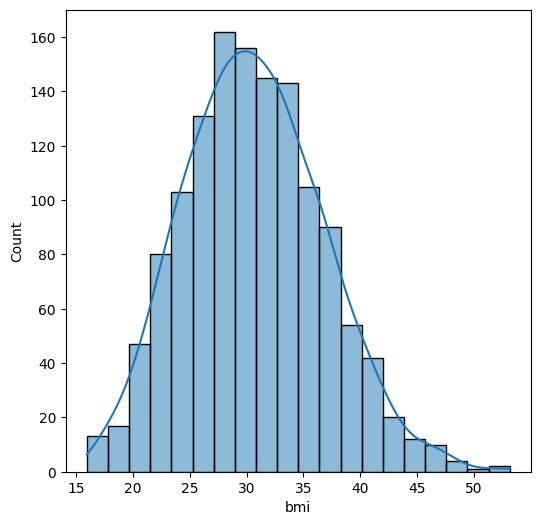

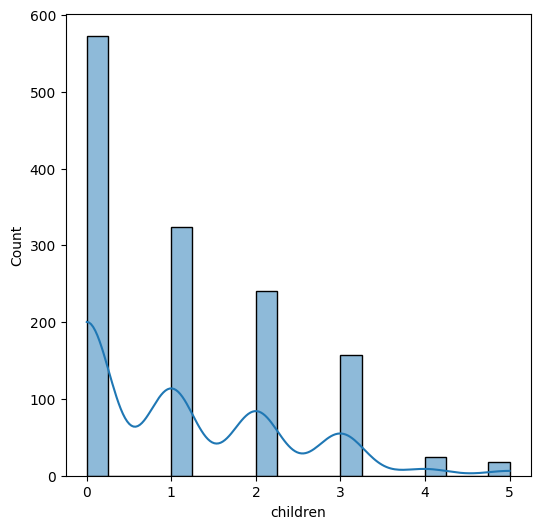

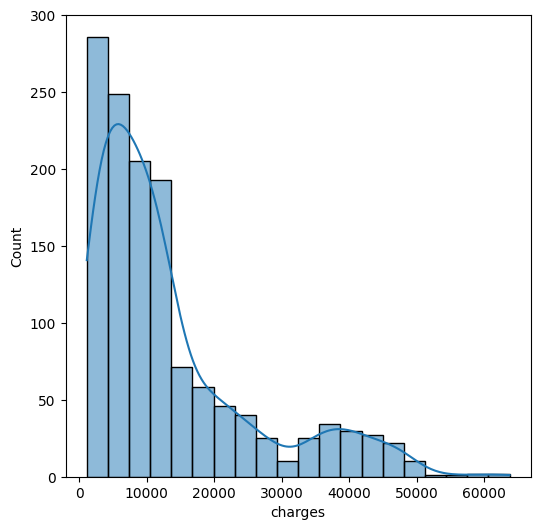

In [7]:
numeric_cols = ['age', 'bmi', 'children',  'charges' ]
for cols in numeric_cols:
    plt.figure(figsize=(6,6))
    sns.histplot(health_insu[cols], kde=True, bins=20)

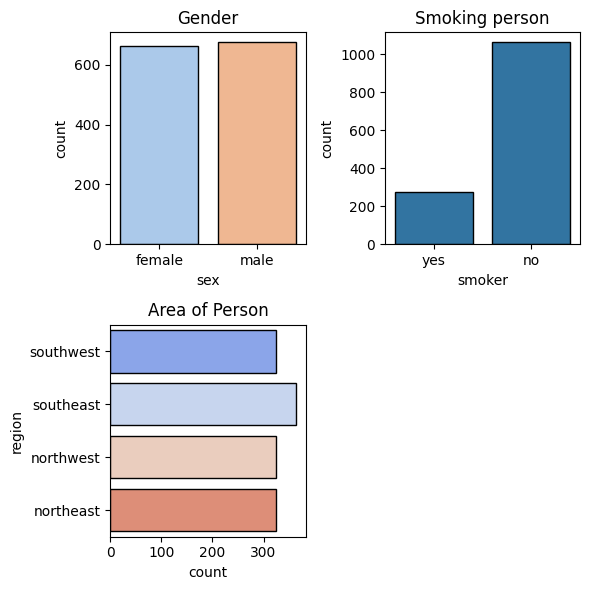

In [8]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)

sns.countplot(x = 'sex', hue='sex', data=health_insu, palette='pastel',edgecolor='black')
plt.title('Gender')
plt.subplot(2,2,2)
sns.countplot(x='smoker', data=health_insu, edgecolor='black')
plt.title('Smoking person')
plt.subplot(2,2,3)
sns.countplot(y='region', data=health_insu, edgecolor='black', palette='coolwarm')
plt.title('Area of Person')
plt.tight_layout()

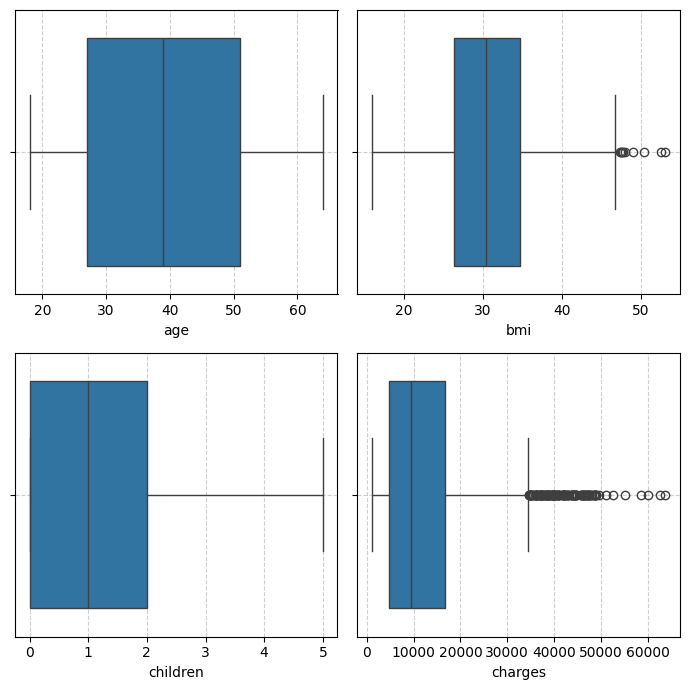

In [9]:
# Create a Box-plot using subplot
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)

sns.boxplot(x = 'age',  data=health_insu)
plt.grid(True, linestyle='--', alpha=0.6)
plt.subplot(2,2,2)
sns.boxplot(x='bmi', data=health_insu )
plt.grid(True, linestyle='--', alpha=0.6)
plt.subplot(2,2,3)
sns.boxplot(x='children', data=health_insu)
plt.grid(True, linestyle='--', alpha=0.6)
plt.subplot(2,2,4)
sns.boxplot(x='charges', data=health_insu)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

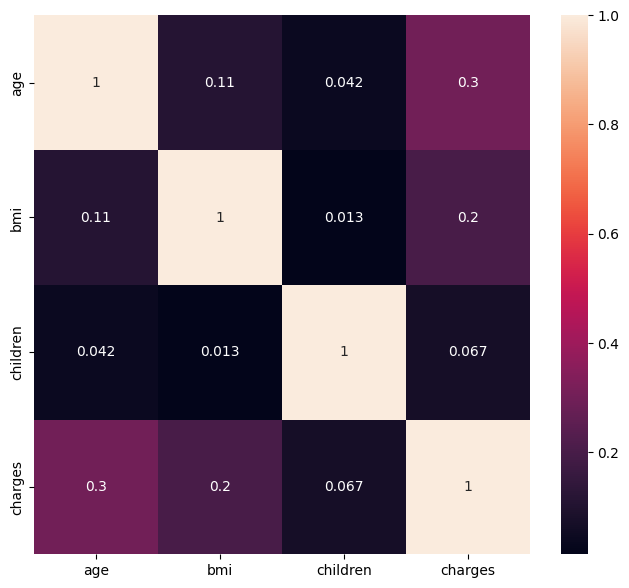

In [10]:
plt.figure(figsize=(8,7))
sns.heatmap(health_insu.corr(numeric_only=True), annot=True)
plt.show()

## Data preprocessing

In [11]:
health_insu.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [12]:
insurance_df_copy = health_insu.copy()

In [13]:
insurance_df_copy.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [14]:
insurance_df_copy['sex'] = insurance_df_copy['sex'].map({'female': 0, 'male': 1})

In [15]:
insurance_df_copy['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [16]:
insurance_df_copy['smoker'] = insurance_df_copy['smoker'].map({'no': 0, 'yes': 1})

In [17]:
insurance_df_copy['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [18]:
insurance_df_copy = pd.get_dummies(insurance_df_copy,columns = ['region'],drop_first=True)

In [19]:
insurance_df_copy.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [20]:
insurance_df_copy = insurance_df_copy.astype(int)

In [21]:
insurance_df_copy.head(1)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1


In [22]:
insurance_df_copy.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

## Feature Engineering and Extraction

##### Continuous BMI values were converted into clinically defined categories to help model health risk patterns more effectively.

In [23]:
insurance_df_copy['bmi categories'] = pd.cut(insurance_df_copy['bmi'],
                          bins=[0, 18.5, 24.9, 29.9, float('inf')],
                          labels=['Underweight', 'Normalweight', 'Overweight', 'Obesity'])

In [24]:
insurance_df_copy.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi categories
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obesity
2,28,1,33,3,0,4449,0,1,0,Obesity
3,33,1,22,0,0,21984,1,0,0,Normalweight
4,32,1,28,0,0,3866,1,0,0,Overweight


##### BMI category labels were one-hot encoded to ensure compatibility with machine learning algorithm

In [25]:
insurance_df_copy = pd.get_dummies(insurance_df_copy,columns = ['bmi categories'],drop_first=True)

In [26]:
insurance_df_copy.head(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi categories_Normalweight,bmi categories_Overweight,bmi categories_Obesity
0,19,0,27,0,1,16884,0,0,1,False,True,False
1,18,1,33,1,0,1725,0,1,0,False,False,True


In [27]:
insurance_df_copy = insurance_df_copy.astype(int)

In [28]:
insurance_df_copy.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi categories_Normalweight,bmi categories_Overweight,bmi categories_Obesity
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0


In [29]:
insurance_df_copy.shape

(1337, 12)

In [30]:
from sklearn.preprocessing import StandardScaler

##### Standardization was applied to numerical features to ensure consistent feature scaling and improve model convergence and performance

In [31]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
insurance_df_copy[numeric_cols] = scaler.fit_transform(insurance_df_copy[numeric_cols] )

In [32]:
insurance_df_copy.head(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi categories_Normalweight,bmi categories_Overweight,bmi categories_Obesity
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1


In [33]:
x = insurance_df_copy.drop('charges', axis=1)
y = insurance_df_copy['charges']

### Train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

## Linear Regression Algorithm Apply

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = lin_reg.predict(x_test)

## Evaluate metrics

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"r2_score, {r2}")

r2_score, 0.8046658529849047


## Adjusted Score Check

In [42]:
n = x_test.shape[0]
p = x_test.shape[1]

In [43]:
adjusted_r2 = 1-(1-r2) * (n-1)/ (n-p-1)
print(f"Adjusted_r2", adjusted_r2)

Adjusted_r2 0.7962725888553498


In [44]:
insurance_df_copy.head(1)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi categories_Normalweight,bmi categories_Overweight,bmi categories_Obesity
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0


In [45]:
single_sample = x_test.iloc[[10]]
lin_reg.predict(single_sample)


array([10685.99430185])

In [46]:
y_test.head(10)

900      8688
1064     5708
1256    11436
298     38746
237      4463
481      9304
240     38511
277      2150
415      7345
707     10264
Name: charges, dtype: int64

In [47]:
pd.DataFrame({
    'Actual': y_test.iloc[[9]].values,
    'Predicted': lin_reg.predict(x_test.iloc[[10]])
})


,Actual,Predicted
0,10264,10685.994302


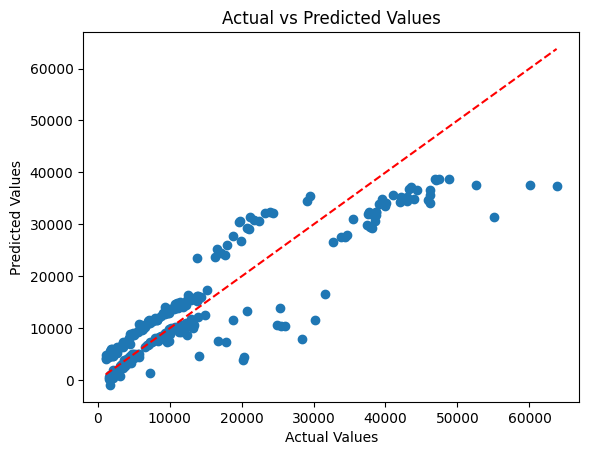

In [48]:
y_pred = lin_reg.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()


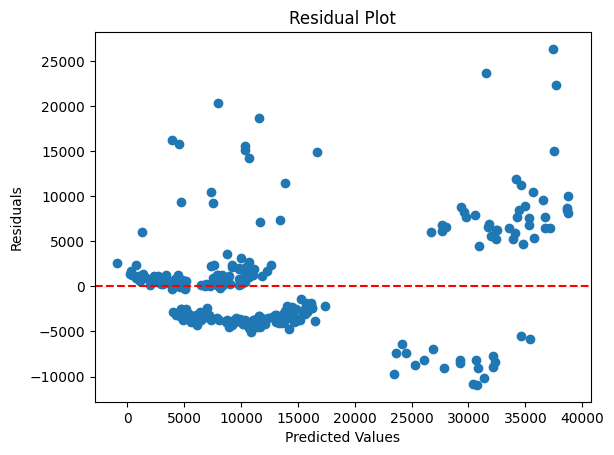

In [49]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


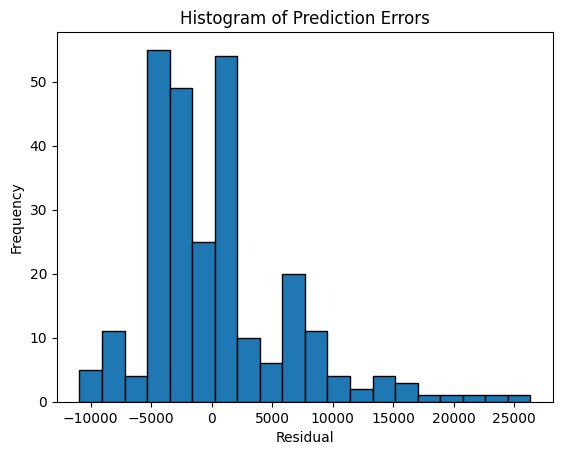

In [50]:
plt.hist(residuals, bins=20,edgecolor='black')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Prediction Errors")
plt.show()
